<center><b>In the name of God</b></center>

<b>Course</b>: Machine Learning
<br>
<b>Description:</b> HomeWork 1 | Question 1
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [19]:
# Import Allowed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and Overview

In [20]:
# Reading Dataset
data = pd.read_csv("dataset1.csv")

[]

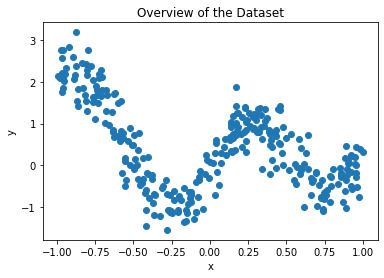

In [21]:
# Plotting Data
plt.scatter(x=data["x"], y=data["y"])
plt.title("Overview of the Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

# Shuffling Needed?

[]

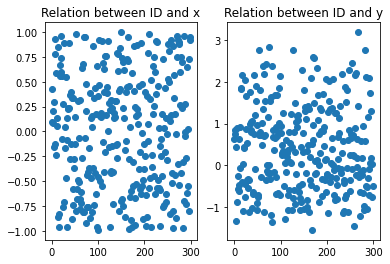

In [22]:
# Checking the realation of ID and features

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(x=range(300), y=data["x"])
ax[0].set_title("Relation between ID and x")

ax[1].scatter(x=range(300), y=data["y"])
ax[1].set_title("Relation between ID and y")

plt.plot()

[]

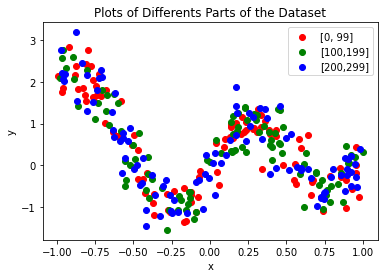

In [23]:
# Checking plots of differents parts of the dataset
plt.scatter(x=data["x"][:100], y=data["y"][:100], color="red", label="[0, 99]")
plt.scatter(x=data["x"][100:200], y=data["y"][100:200], color="green", label="[100,199]")
plt.scatter(x=data["x"][200:], y=data["y"][200:], color="blue", label="[200,299]")
plt.title("Plots of Differents Parts of the Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.plot()

# Train and Test Split

In [24]:
# 80% for train, 20% for test
data_train = data.head(240)
data_test = data.tail(60)

In [25]:
x_train = data_train["x"].values
y_train = data_train["y"].values

In [26]:
x_test = data_test["x"].values
y_test = data_test["y"].values

# Polynomial

In [27]:
class Polynomial():
    """ Class Polynomial store a coefficients of a polynomial"""
    
    def __init__(self, degree):
        """ 
        Create a polynomial object.
        
        degree: degree of the polynomial 
        """
        self.degree = degree
        
        self.c = np.zeros(degree+1)
        # Coefficients of polynomial: c[n]*(x**n) + ... + c[2]*(x**2) + c[1]*(x) + c[0]
    
    def single_apply(self, x):
        """
        Apply the polynomial to a point
        
        x: a point
        """
        
        sum = 0
        for i, ci in enumerate(self.c):
            sum += ci * (x**i)

        return sum
    
    def apply(self, x):
        """ 
        Apply the polynomial to an array of points
        
        x: array of points
        """
        return np.array(self.single_apply(x))
    
    
    def set_c(self, c):
        """ Setter for c"""
        self.c = c
    
    def get_c(self):
        """ Getter for c"""
        return self.c
    
    def plot(self, title=""):
        """
        Plot the polynomial with train data
        
        title: the optional title for plot
        """
        x = np.arange(-1, +1, 0.01)
        y = self.apply(x)

        plt.plot(x, y, color="red")
        plt.scatter(x_train, y_train)
        plt.title(title)
        plt.show()

# Loss Function

In [28]:
class LossFunction():
    """ Some Loss functions and partial derivation of them located in this class """
    
    @staticmethod
    def mse(y_predict, y_real):
        """ Mean Square Error """
        arr = (np.subtract(y_real,y_predict))**2
        return np.sum(arr) / len(y_predict)

    @staticmethod
    def partial_mse(y_predict, y_real, x, partial_degree):
        """ Partial derivation of Mean Square Error"""
        arr = np.multiply((x**partial_degree), (np.subtract(y_real, y_predict)))    
        return -2*np.sum(arr)/len(x)
    
    @staticmethod
    def rmse(y_predict, y_real):
        """ Root Mean Square Error """
        mse = LossFunction.mse(y_predict, y_real)
        return mse**(0.5)
    
    @staticmethod
    def partial_rmse(y_predict, y_real, x, partial_degree):
        """ Partial derivation of Root Mean Square Error"""
        return LossFunction.partial_mse(y_predict, y_real, x, partial_degree) / (2 * LossFunction.rmse(y_predict, y_real))
    
    @staticmethod
    def mae(y_predict, y_real):
        """ Mean Absolute Error """
        arr = np.subtract(y_real, y_predict)
        arr = abs(arr)
        return sum(arr) / len(y_predict)
    
    @staticmethod
    def partial_mae(y_predict, y_real, x, partial_degree):
        """ Partial derivation of Mean Absolute Error """
        arr = np.multiply(np.sign(np.subtract(y_real, y_predict)),x**partial_degree) 
        return -1*np.sum(arr)/len(x)

# Gradient Descent

In [12]:
class PolynomialGradientDescent():
    """ This class try to match a polynomial pattern to train data with Gradient Descent method """
    def __init__(self, number_epoch, degree, loss_function_name):
        """
        Create a PolynomialGradientDescent
        
        number_epoch: The required number of epochs
        degree: The degree of suggested polynomial
        loss_function_name: The name of loss function 
        
        """
        
        # Learning rate configuration
        self.learning_rate_initial = 0.5
        self.learning_rate = self.learning_rate_initial
        self.decrease_learning_rate = self.learning_rate_initial / number_epoch
            
        # Array for storing error and learning values 
        self.train_error = []
        self.test_error = []
        self.learning_rate_value = []
    
        self.number_epoch = number_epoch
        
        self.polynomial = Polynomial(degree=degree)
        
        self.loss_function_name = loss_function_name
        self._set_loss_function()
            
    def _set_loss_function(self):
        """Set requested loss function """
        
        if self.loss_function_name == "MSE":
            self.loss_function = LossFunction.mse
            self.partial_loss_function = LossFunction.partial_mse
        elif self.loss_function_name == "RMSE":
            self.loss_function = LossFunction.rmse
            self.partial_loss_function = LossFunction.partial_rmse
        elif self.loss_function_name == "MAE":
            self.loss_function = LossFunction.mae
            self.partial_loss_function = LossFunction.partial_mae
        else:
            raise Exception("Unkwon Loss Function Name!")
        
    def run(self):
        """ Run Gradient Descent! """
        for epoch in range(self.number_epoch):
            self._collect_epoch_statistic(epoch)
            
            c_new = []
            y_predict = self.polynomial.apply(x_train)
            
            for i, ci in enumerate(self.polynomial.get_c()):
                ci_new = ci - self.learning_rate * self.partial_loss_function(y_predict, y_train, x_train, i)
                c_new.append(ci_new)

            self.polynomial.set_c(np.array(c_new))
            self.learning_rate -= self.decrease_learning_rate
            
        self._collect_epoch_statistic(epoch)
            
    def _collect_epoch_statistic(self, epoch):
        """ Collect statistics per epoch """
        self.learning_rate_value.append(self.learning_rate)
        
        y_predict = self.polynomial.apply(x_train)
        self.train_error.append(self.loss_function(y_predict, y_train))
        
        y_predict = self.polynomial.apply(x_test)
        self.test_error.append(self.loss_function(y_predict, y_test))
            
    def _configuration_title(self):
        """ Generating a string that contains configurations of the method """
        return f"Degree = {self.polynomial.degree} | Number Epochs = {self.number_epoch} | Loss Function = {self.loss_function_name}"
    
    def plot_final_prediction(self):
        """ Plot final prediction """
        self.polynomial.plot(self._configuration_title())
        
        y_predict = self.polynomial.apply(x_train)
        train_error = self.loss_function(y_predict, y_train)
        
        y_predict = self.polynomial.apply(x_test)
        test_error = self.loss_function(y_predict, y_test)
        
        print(f"Final Train Error= {train_error}")
        print(f"Final Test Error= {test_error}")
            
    def plot_train_test_error(self):
        """ Plot train error and test error over epochs """
        x = np.arange(0, self.number_epoch+1)
        
        plt.plot(x, self.train_error, color="green", label="Train Error")
        plt.plot(x, self.test_error, color="red", label="Test Error")
        plt.legend()
        plt.title(f"Train Error VS Test Error \n {self._configuration_title()}")
        
        plt.xlabel("Epoch")
        plt.ylabel("Error")
        plt.show()
        
    
    def plot_learning_rate_value(self):
        """ Plot changing of the learning rate over epochs """
        x = np.arange(0, self.number_epoch+1)
        
        plt.plot(x, self.learning_rate_value, color = "yellow")
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title(f"Learning Rete Changes \n {self._configuration_title()}")
        plt.show()

In [13]:
polynomial_gradient_descent = PolynomialGradientDescent(number_epoch = 10000, degree = 5, loss_function_name="MSE")

In [14]:
polynomial_gradient_descent.run()

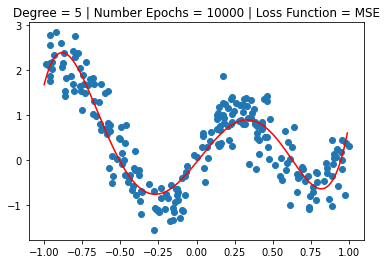

Final Train Error= 0.18115228696478683
Final Test Error= 0.21994003443976629


In [15]:
polynomial_gradient_descent.plot_final_prediction()

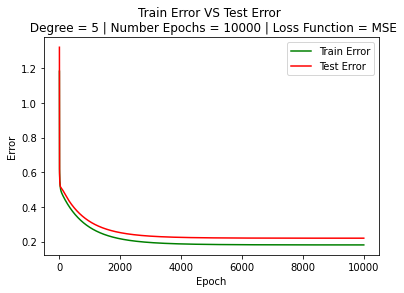

In [16]:
polynomial_gradient_descent.plot_train_test_error()

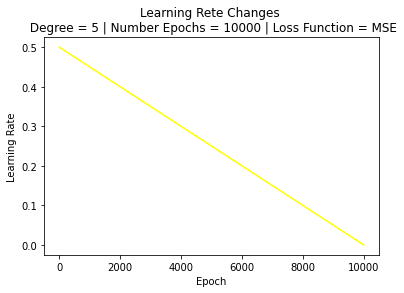

In [17]:
polynomial_gradient_descent.plot_learning_rate_value()

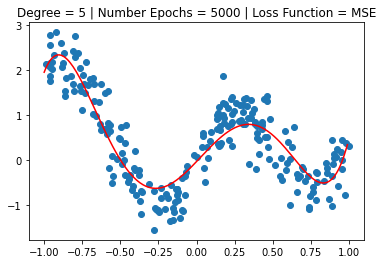

Final Train Error= 0.1956223936880256
Final Test Error= 0.2323784204898667


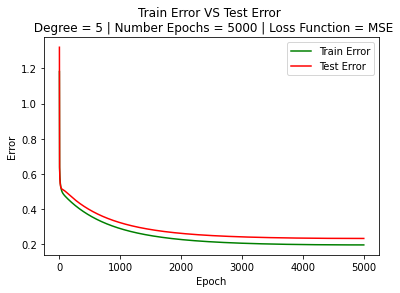

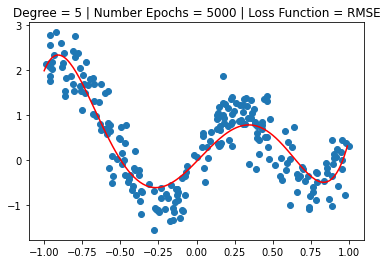

Final Train Error= 0.44569105602030035
Final Test Error= 0.4849440111228003


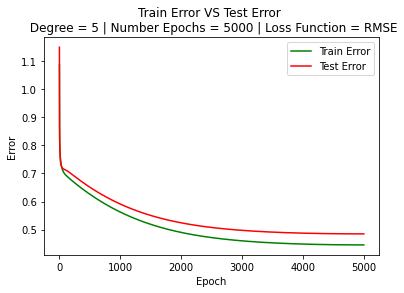

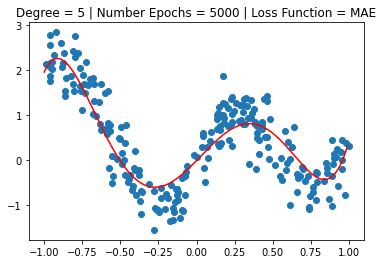

Final Train Error= 0.3655265008132317
Final Test Error= 0.4111390775833481


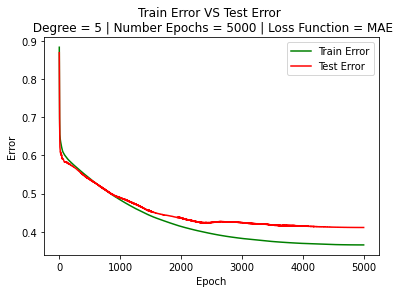

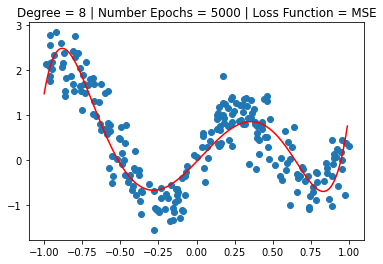

Final Train Error= 0.20795424454744815
Final Test Error= 0.24404688747980025


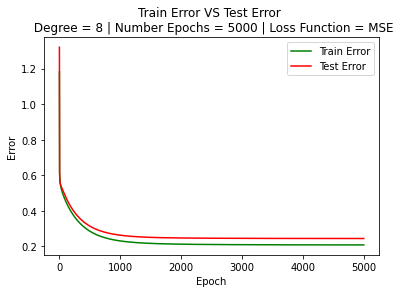

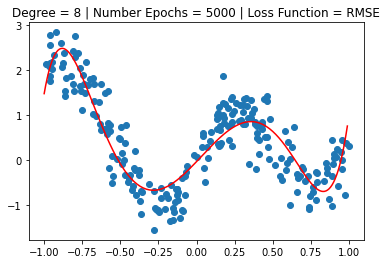

Final Train Error= 0.45599558459646294
Final Test Error= 0.49399453629963197


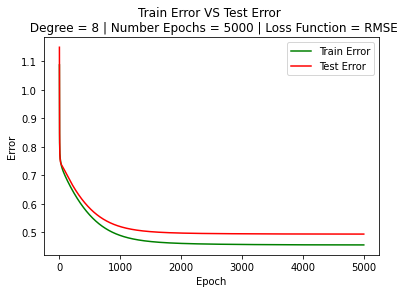

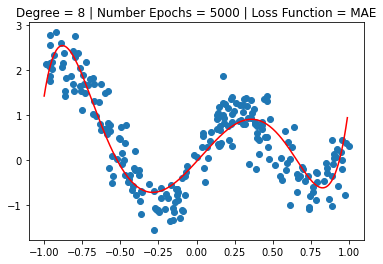

Final Train Error= 0.36487736666092635
Final Test Error= 0.3993382884326856


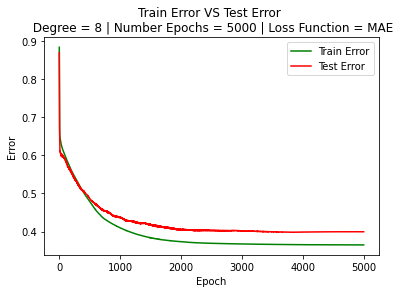

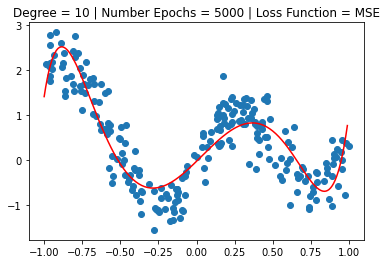

Final Train Error= 0.2201945764578607
Final Test Error= 0.25553095625087163


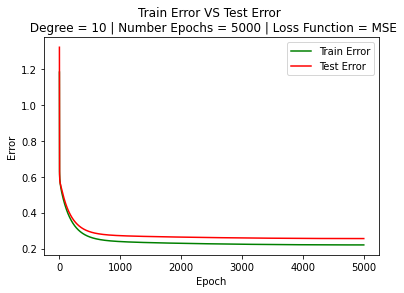

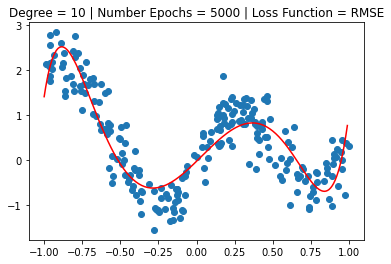

Final Train Error= 0.46944114274245685
Final Test Error= 0.5056665498925172


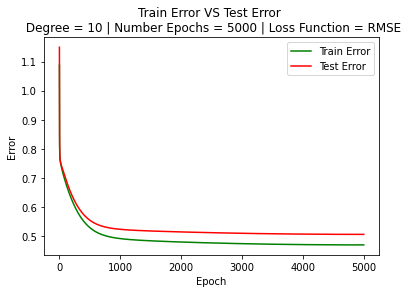

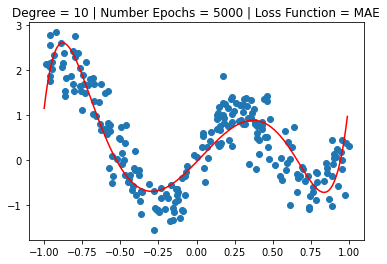

Final Train Error= 0.3790537298618194
Final Test Error= 0.4120135835061252


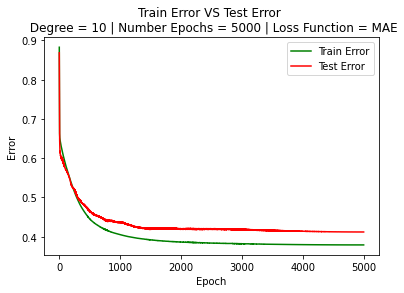

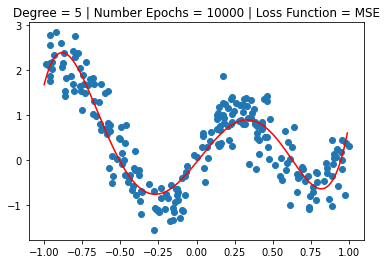

Final Train Error= 0.18115228696478683
Final Test Error= 0.21994003443976629


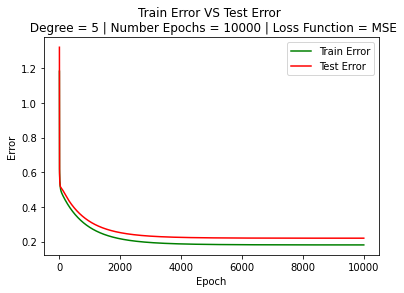

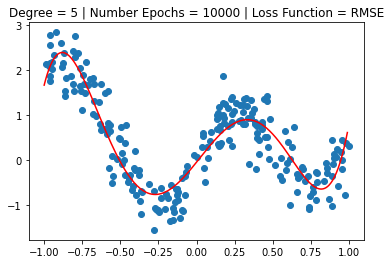

Final Train Error= 0.4253962652986879
Final Test Error= 0.4688676805890121


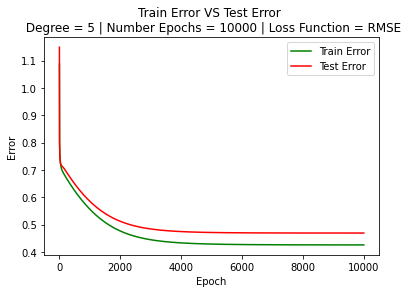

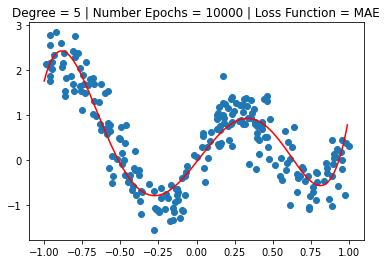

Final Train Error= 0.3379984010508195
Final Test Error= 0.3801593843399372


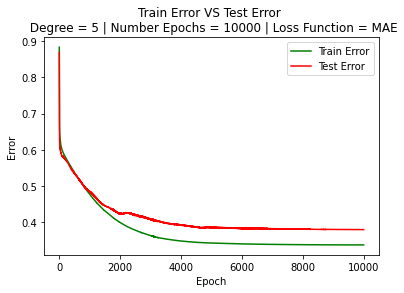

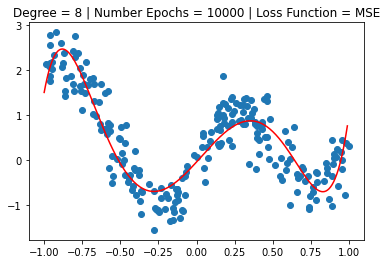

Final Train Error= 0.2019940194342403
Final Test Error= 0.23908215385088336


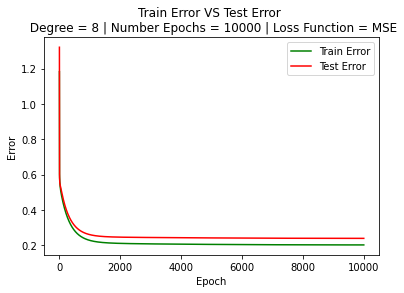

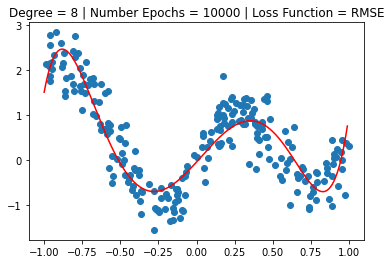

Final Train Error= 0.4487710220863625
Final Test Error= 0.4884202316479879


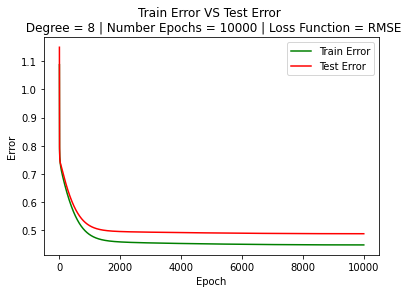

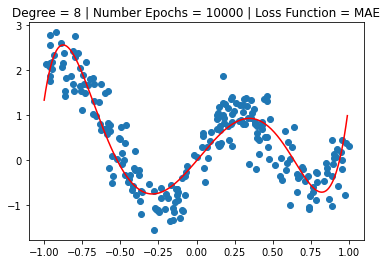

Final Train Error= 0.35834213630190875
Final Test Error= 0.3906597371655476


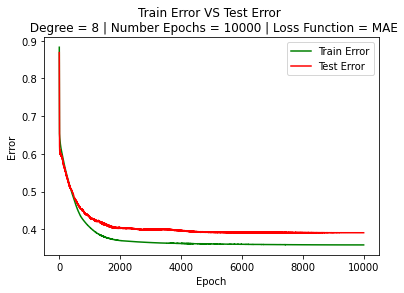

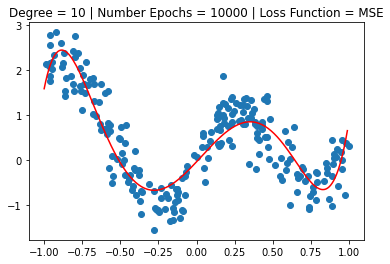

Final Train Error= 0.2006291310718116
Final Test Error= 0.23713372707177463


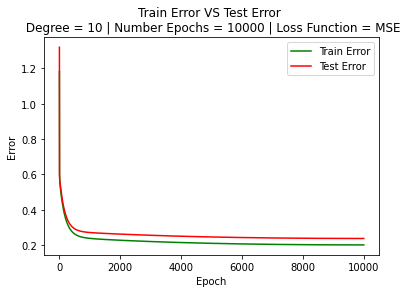

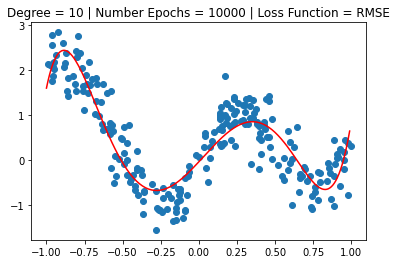

Final Train Error= 0.4463646691287998
Final Test Error= 0.4856111743349119


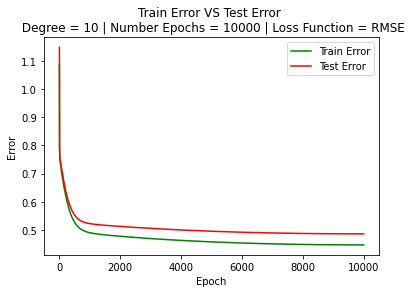

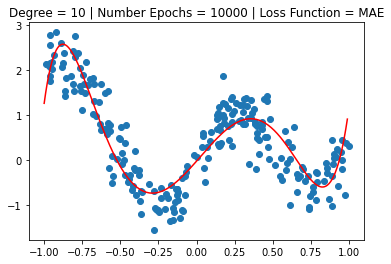

Final Train Error= 0.36271581619445137
Final Test Error= 0.40062879597831313


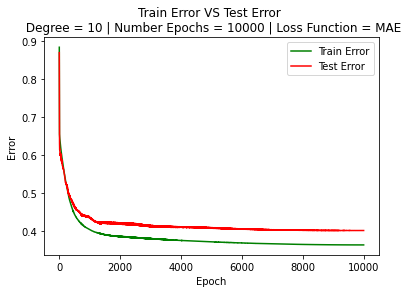

In [32]:
for number_epoch in [5000, 10000]:
    for degree in [5,8,10]:
        for loss_function_name in ["MSE", "RMSE", "MAE"]:
            polynomial_gradient_descent = PolynomialGradientDescent(number_epoch = number_epoch, degree = degree, loss_function_name=loss_function_name)
            polynomial_gradient_descent.run()
            polynomial_gradient_descent.plot_final_prediction()
            polynomial_gradient_descent.plot_train_test_error()

# Normal Equation

In [39]:
class PolynomialNormalEquation():
    """ This class try to match a polynomial pattern to train data with Normal Equation method """

    def __init__(self, degree, lambda_=0):
        """
        Create a PolynomialNormalEquation 
        
        degree: The degree of suggested polynomial
        lambda_: lamda_ parameter that used for regularization. Defult value ignore regularization.
        """
        self.degree = degree
        self.lambda_ = lambda_
        self.polynomial = Polynomial(degree=degree)
        
    def _calculate_x(self):
        """ Clalculate the matrix x """
        self.x = []
        for xi_train in x_train:
            new_x = []
            for di in range(self.degree+1):
                new_x.append(xi_train**(di))
            self.x.append(new_x)
        
        self.x = np.array(self.x)    
    
    def _normal_equation(self):
        """ Calculate normal equation """
        xt = np.transpose(self.x)
        xtx = np.matmul(xt, self.x)
        
        lambda_matrix = np.identity(self.degree + 1) * self.lambda_
        lambda_matrix[0, 0] = 0
        xtx += lambda_matrix
        
        xtxi = np.linalg.inv(xtx)
        xty = np.matmul(xt, y_train)
        c = np.matmul(xtxi, xty)
        self.polynomial.set_c(c)
    
    def plot_final_prediction(self):
        """ Plot final prediction """
        self.polynomial.plot(self._configuration_title())
        
        y_predict = self.polynomial.apply(x_train)
        train_mse_error = LossFunction.mse(y_predict, y_train)
        train_rmse_error = LossFunction.rmse(y_predict, y_train)
        train_mae_error = LossFunction.mae(y_predict, y_train)
        
        y_predict = self.polynomial.apply(x_test)
        test_mse_error = LossFunction.mse(y_predict, y_test)
        test_rmse_error = LossFunction.rmse(y_predict, y_test)
        test_mae_error = LossFunction.mae(y_predict, y_test)
        
        print("Final Train Erorr")
        print(f"MSE = {train_mse_error}")
        print(f"RMSE= {train_rmse_error}")
        print(f"MAE = {train_mae_error}\n")
        
        print(f"Final Test Error")
        print(f"MSE = {test_mse_error}")
        print(f"RMSE= {test_rmse_error}")
        print(f"MAE = {test_mae_error}")
        
                
    def _configuration_title(self):
        """ Generating a string that contains configurations of the method """
        return f"Degree = {self.polynomial.degree} | Lambda = {self.lambda_}"
        
        
    def run(self):
        """ Run Normal Equation! """
        self._calculate_x()
        self._normal_equation()
        

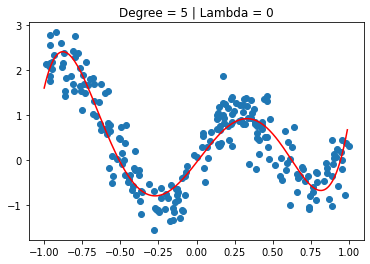

Final Train Erorr
MSE = 0.1804441208337556
RMSE= 0.4247871476795827
MAE = 0.33731449510478834

Final Test Error
MSE = 0.21984312271748946
RMSE= 0.46887431441431027
MAE = 0.3734295597036781


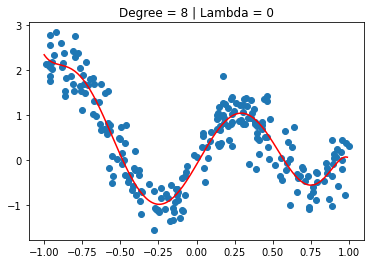

Final Train Erorr
MSE = 0.14801693410812572
RMSE= 0.3847296896629187
MAE = 0.30405462676798956

Final Test Error
MSE = 0.18900573754238278
RMSE= 0.4347479011362594
MAE = 0.3519439762949418


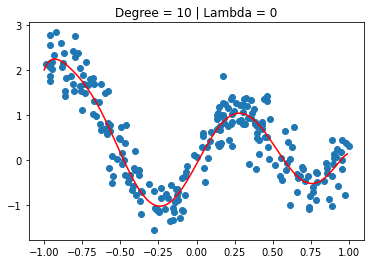

Final Train Erorr
MSE = 0.14644461098980083
RMSE= 0.38268082129863895
MAE = 0.30070680941090094

Final Test Error
MSE = 0.19246000236224517
RMSE= 0.43870263546307214
MAE = 0.35913326217521446


In [40]:
for degree in [5, 8, 10]:
    polynomial_normal_equation = PolynomialNormalEquation(degree=degree, lambda_=0)
    polynomial_normal_equation.run()
    polynomial_normal_equation.plot_final_prediction()

# Regularization

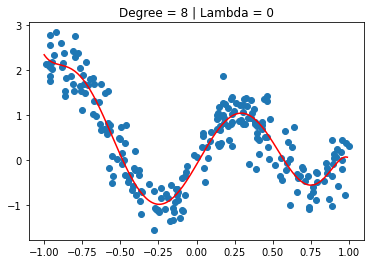

Final Train Erorr
MSE = 0.14801693410812572
RMSE= 0.3847296896629187
MAE = 0.30405462676798956

Final Test Error
MSE = 0.18900573754238278
RMSE= 0.4347479011362594
MAE = 0.3519439762949418


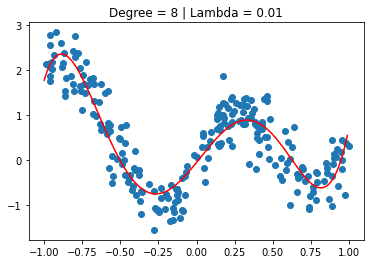

Final Train Erorr
MSE = 0.1780186417760772
RMSE= 0.42192255423961067
MAE = 0.33752667869647895

Final Test Error
MSE = 0.2171829964138934
RMSE= 0.46602896520913095
MAE = 0.37518189557153164


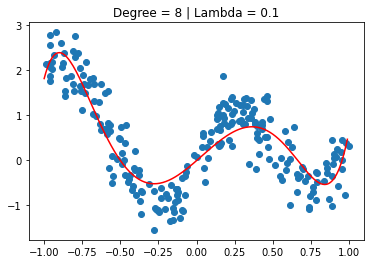

Final Train Erorr
MSE = 0.22234224645813144
RMSE= 0.47153180853271337
MAE = 0.38646476374656635

Final Test Error
MSE = 0.25584270848824897
RMSE= 0.5058089644206091
MAE = 0.4108652528221165


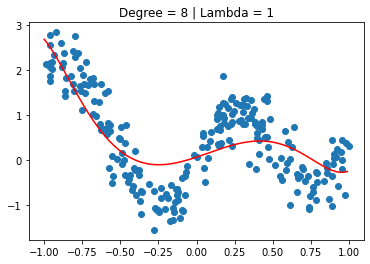

Final Train Erorr
MSE = 0.3877123328898955
RMSE= 0.6226655064237102
MAE = 0.5295330851873913

Final Test Error
MSE = 0.4120835080432286
RMSE= 0.6419373084992246
MAE = 0.5196299374476573


In [45]:
for lambda_ in [0, 0.01,0.1, 1]:
    polynomial_normal_equation = PolynomialNormalEquation(degree=8, lambda_=lambda_)
    polynomial_normal_equation.run()
    polynomial_normal_equation.plot_final_prediction()